<a href="https://colab.research.google.com/github/Gctucci/cognitivo/blob/main/CognitivoAI_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas_profiling[notebook]
!pip install pandas_profiling --upgrade
!pip install dataprep
!pip install sentence-transformers
!pip install focal-loss

     |████████████████████████████████| 261 kB 30.0 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 303 kB 47.0 MB/s 
     |████████████████████████████████| 102 kB 16.6 MB/s 
     |████████████████████████████████| 690 kB 45.4 MB/s 
     |████████████████████████████████| 596 kB 88.5 MB/s 
     |████████████████████████████████| 3.1 MB 72.1 MB/s 
     |████████████████████████████████| 10.9 MB 52.0 MB/s 
     |████████████████████████████████| 812 kB 58.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=1f8895b06b87a20d9c919b73df73541324aea9d24f79b32906c07e7d6dba9401
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=a09e5ec7c1435dfeddd0642e6a9d23352392c0f62fc81cfaea2657ccb3e77479


     |████████████████████████████████| 9.5 MB 27.4 MB/s 
     |████████████████████████████████| 1.0 MB 60.2 MB/s 
     |████████████████████████████████| 965 kB 71.7 MB/s 
     |████████████████████████████████| 1.5 MB 70.6 MB/s 
     |████████████████████████████████| 943 kB 75.3 MB/s 
     |████████████████████████████████| 50 kB 9.0 MB/s 
     |████████████████████████████████| 366 kB 71.3 MB/s 
     |████████████████████████████████| 132 kB 78.6 MB/s 
     |████████████████████████████████| 28.5 MB 1.3 MB/s 
     |████████████████████████████████| 95 kB 5.4 MB/s 
     |████████████████████████████████| 78 kB 9.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 749 kB 61.8 MB/s 
     |████████████████████████████████| 1.1 MB 59.5 MB/s 
     |████████████████████████████████| 271 kB 76.6 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |██████

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("listings.csv")
print(df.columns)
print(df.dtypes)
df.describe()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

id     scrape_id       host_id  host_listings_count  \
count  2.341400e+04  2.341400e+04  2.341400e+04         23396.000000   
mean   2.641178e+07  2.021093e+13  1.042743e+08             8.844290   
std    1.665127e+07  1.921916e+00  1.142081e+08            32.205309   
min    1.787800e+04  2.021093e+13  3.607000e+03             0.000000   
25%    1.242405e+07  2.021093e+13  1.427959e+07             1.000000   
50%    2.618998e+07  2.021093e+13  6.037972e+07             1.000000   
75%    4.193944e+07  2.021093e+13  1.594694e+08             4.000000   
max    5.249405e+07  2.021093e+13  4.245700e+08           589.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               23396.000000                           0.0  23414.000000   
mean                    8.844290                           NaN    -22.965906   
std                    32.205309                           NaN      0.035351   
min                     0.000000                           NaN    -23.072620   
25%                     1.000000                           NaN    -22.984650   
50%                     1.000000                           NaN    -22.971915   
75%                     4.000000                           NaN    -22.950905   
max                   589.000000                           NaN    -22.749690   

          longitude  accommodates  bathrooms  ...  review_scores_checkin  \
count  23414.000000  23414.000000        0.0  ...           14618.000000   
mean     -43.248440      4.124840        NaN  ...               4.870508   
std        0.096823      2.482795        NaN  ...               0.397543   
min      -43.698890      0.000000        NaN  ...               0.000000   
25%      -43.303010      2.000000        NaN  ...               4.900000   
50%      -43.196135      4.000000        NaN  ...               5.000000   
75%      -43.186120      5.000000        NaN  ...               5.000000   
max      -43.104400     16.000000        NaN  ...               5.000000   

       review_scores_communication  review_scores_location  \
count                 14620.000000            14617.000000   
mean                      4.850292                4.849142   
std                       0.420981                0.379942   
min                       1.000000                1.000000   
25%                       4.870000                4.860000   
50%                       5.000000                5.000000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  license  calculated_host_listings_count  \
count         14619.000000      0.0                    23414.000000   
mean              4.638280      NaN                        7.226787   
std               0.508422      NaN                       21.690645   
min               1.000000      NaN                        1.000000   
25%               4.500000      NaN                        1.000000   
50%               4.760000      NaN                        1.000000   
75%               5.000000      NaN                        3.000000   
max               5.000000      NaN                      187.000000   

       calculated_host_listings_count_entire_homes  \
count                                 23414.000000   
mean                                      6.344965   
std                                      21.170269   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                     183.000000   

       calculated_host_listings_count_private_rooms  \
count                                  23414.000000   
mean                                       0.773981   
std                                        1.762423   
min                                        0.000000   
2

## Análise Exploratória Inicial dos Dados

Para a análise exploratória inicial dos dados, será utilizada a biblioteca [Dataprep](https://dataprep.ai/). Ela foi escolhida em detretimento de outras mais conhecidas, como Pandas-profiling, por sua maior capacidade de escalibidade (10-100x maior).

E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'neighbourhood...sed', 'review_scores...ion', 'calculated_ho...oms'
E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'review_scores...ion'
E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'review_scores...ion'


DataPrep Report
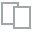
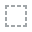
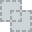
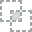
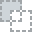
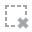
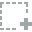
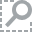
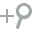
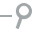
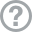
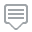
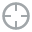
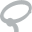
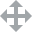
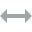
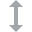
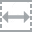
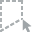
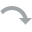
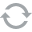
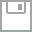
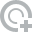
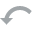
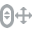
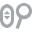
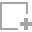
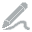
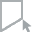
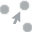
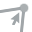
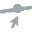

In [2]:
from dataprep.eda import create_report

report = create_report(df)
report

Pode-se observar a presença de colunas de identificação ("id") únicas para cada amostra de dados. Além disso, há a presença de variáveis que representam o mesmo tipo de informação, como a variável "host_id" e "host_name" (ambas representam o host responsável pela hospedagem, sendo a primeira coluna em formato inteiro e a segunda em texto). Uma vez que os dados podem apresentam problemas com a variável "host_name", como a presença de espaços em branco ou outros erros de digitação decorrentes do próprio usuário, nessa análise de ambas as colunas será considerada somente a "host_id", sendo esta encarada como uma variável categórica (e portanto sujeita a futuros processamentos de dados do tipo *One-Hot Encoding*). A escolha da coluna "host_id" em detrimento da coluna "host_name" também se deve ao fato da segunda possuir valores faltantes (18 em particular), enquanto a primeira está totalmente completa.

Finalmente, muitas variáveis apresentadas na base não aparentam seguir uma distribuição normal (observação empírica através de histograma, carece de validação estatística), e várias delas possuem uma proporção significativamente alta de dados faltantes (acima de 50%), como as variáveis "bathrooms", "license" e "calendar_updated". Analisando a correlação entre as variáveis, percebe-se ainda um alto grau de correlação entre várias delas, como entre as variáveis "availability_30", "availability_60", "availability_90".

Outro ponto a ser considerado nesse problema de classificação é que a variável "room_type" não é igualmente distribuída, o que significa que o modelo a ser construído deve se atentar para esse desbalanceamento dos dados

### Correlações do modelo

Em um primeiro momento, dado que o objetivo é criar um modelo de classificação para "room_type", e que este representa o estilo da locação oferecida (somente um quarto, casa completa, etc), algumas variaveis presentes nos dados tem grande potencial de direcionar o modelo de forma negativa. Por exemplo, caso muitos hosts do Airbnb ofereçam somente uma única propriedade na plataforma, há uma alta correlação entre as variáveis "room_type" e "host_<id, name>". Além disso algumas variáveis parecem não contribuir para o problema diretamente, como a variável "has_availability" ou "first_review". Assim, para evitar problemas de modelagem, uma análise de correlação entre "room_type" e as demais variáveis será realizada, buscando identificar aquelas com maior importância para o problema, porém evitando utilizar somente aquelas com alta correlação, o que pode potencialmente enviesar o modelo proposto.

Faremos o processo nas seguintes etapas:
* Primeiramente converteremos a variável "room_type" para uma representação numérica, usando a forma One-hot encoding para evitar problemas de ordem
* Em segundo lugar eliminaremos as variáveis numéricas com alto grau de correlação (acima de +-0.8), evitando a modelagem de variáveis que representam o mesmo tipo de informação. A escolha somente das variáveis numéricas é para evitar transformações das demais variáveis não-numéricas sem antes considerar sua utilidade para a construção do modelo.
* Em terceiro lugar analisaremos manualmente as variáveis não-numéricas e as selecionaremos com base na intenção do modelo e contexto do problema.

### Transformação da variável room_type e seleção/limpeza das variáveis numéricas

**OBS** A variável "host_id" seja categórica, neste contexto ela será considerada numérica para fins de cálculo de correlação, e será removida da análise (bem como "host_name") para evitar potenciais vieses do modelo

In [3]:
from sklearn.preprocessing import OneHotEncoder
# Transformação da variável room_type em one-hot encoding
# Essa opção é preferível à função do pandas "get_dummies" por permitir a reutilização
# do modelo de enconding em dados novos
one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
room_type = one_hot.fit_transform(df["room_type"].to_numpy().reshape(-1, 1))
print(room_type[:10])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [4]:
# Transformação da variável "price" de categórico para numérico
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
# Transformação da variável "response_rate" de categórico para numérico
df["host_response_rate"].fillna(-1, inplace=True)
df["host_acceptance_rate"].fillna(-1, inplace=True)
df["host_response_rate"] = df["host_response_rate"].replace('[\%,]', '', regex=True).astype(float)
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace('[\%,]', '', regex=True).astype(float)
df["host_response_rate"] = df["host_response_rate"].replace(-1, df["host_response_rate"].mean()).astype(float)
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace(-1, df["host_acceptance_rate"].mean()).astype(float)

# Seleção somente das variáveis numéricas
num_df = df.select_dtypes(include=np.number)
# Remoção das colunas "id", "host_id" e "scrape_id", "latitude" e "longitude" por seu alto grau de informação
num_df.drop(["id", "scrape_id", "host_id", "latitude", "longitude"], inplace=True, axis=1)
# Remoção das colunas com TODOS os elementos vazios
num_df.dropna(axis=1, how='all', inplace=True)
print(num_df.columns)
display(num_df.head())

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


host_response_rate  host_acceptance_rate  host_listings_count  \
0               100.0             98.000000                  2.0   
1                50.0             45.290723                  0.0   
2                50.0             36.000000                  3.0   
3               100.0             45.290723                  1.0   
4               100.0             97.000000                  1.0   

   host_total_listings_count  accommodates  bedrooms  beds  price  \
0                        2.0             5       2.0   2.0  350.0   
1                        0.0             2       1.0   1.0  297.0   
2                        3.0             2       1.0   2.0  160.0   
3                        1.0             2       1.0   1.0  271.0   
4                        1.0             2       1.0   1.0  121.0   

   minimum_nights  maximum_nights  ...  review_scores_cleanliness  \
0               4             180  ...                       4.63   
1               3              90  ...                       4.78   
2               7              60  ...                       4.76   
3               2              89  ...                       4.63   
4               3              15  ...                       4.94   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.82                         4.90                    4.76   
1                   4.90                         4.90                    4.97   
2                   4.77                         4.90                    4.81   
3                   4.85                         4.88                    4.90   
4                   4.96                         4.94                    4.94   

   review_scores_value  calculated_host_listings_count  \
0                 4.65                               1   
1                 4.58                               1   
2                 4.56                               2   
3                 4.65                               1   
4                 4.87                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            1   
2                                            2   
3                                            1   
4                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               2.07  
1                                            0               0.86  
2                                            0               1.86  
3                                            0               1.92  
4                                            0               3.05  

[5 rows x 35 columns]

### Remoção das variáveis numéricas com alta correlação

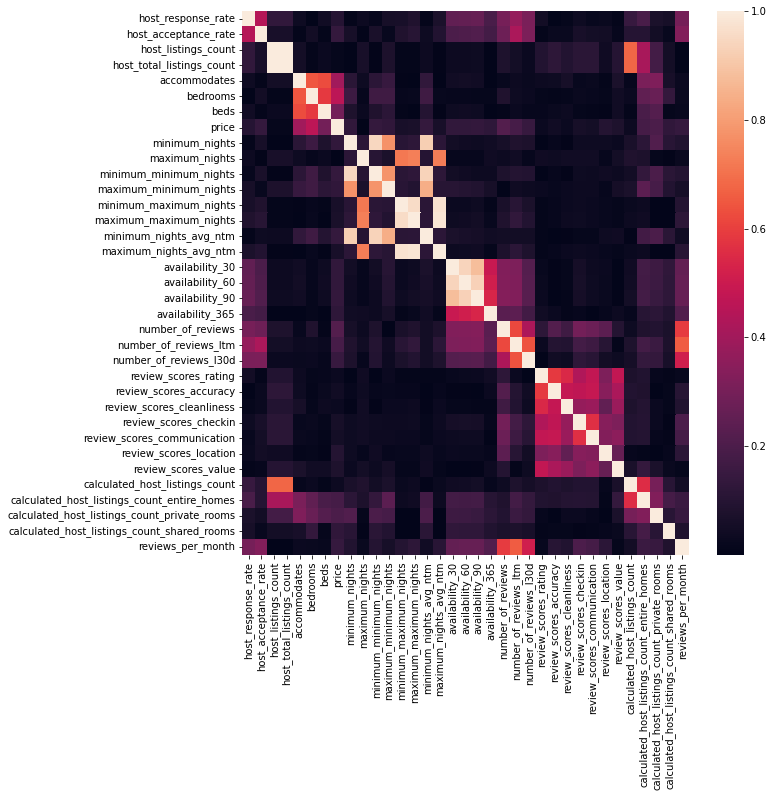

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
       'availability_30', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')
De um total de 35 colunas numéricas, foram selecionadas apenas 28 colunas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau

def plot_corr(cormatrix, show_columns=True, annot=True):
  if show_columns:
    cols = [i.split()[0] for i in cormatrix.columns]
  else:
    cols = [i for i in range(cormatrix.shape[1])]
  fig = plt.figure(figsize = (10,10))
  sns.heatmap(cormatrix, xticklabels=cols, yticklabels=cols, annot=annot)
  plt.show()

kendall_cormatrix= num_df.corr(method='kendall').abs()
plot_corr(kendall_cormatrix, show_columns=True, annot=False)

# Select upper triangle of correlation matrix
upper = kendall_cormatrix.where(np.triu(np.ones(kendall_cormatrix.shape), k=1).astype(np.bool))
CORR_THRES = 0.8
# Find features with correlation less than CORR_THRES
to_drop = [column for column in upper.columns if any(upper[column] > CORR_THRES)]
# Drop features 
selected_df = num_df.drop(to_drop, axis=1)
selected_columns = selected_df.columns
print(selected_columns)
print("De um total de {0} colunas numéricas, foram selecionadas apenas {1} colunas".format(num_df.shape[-1], len(selected_columns)))

Além da seleção baseada na correlação acima, é importante verificar que algumas variáveis numéricas estão diretamente ligadas ao problema em questão, podendo enviesar o modelo. Entre elas, encontram-se as variáveis "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", e "calculated_host_listings_count_shared_rooms" sendo estas portanto removidas da análise

In [6]:
CORR_COLS = ['calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']
cleaned_num_df = num_df[list(selected_columns)]
cleaned_num_df = cleaned_num_df.drop(CORR_COLS, axis=1, errors="ignore")
print(cleaned_num_df.columns)
display(cleaned_num_df.head())

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
       'availability_30', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')


host_response_rate  host_acceptance_rate  host_listings_count  \
0               100.0             98.000000                  2.0   
1                50.0             45.290723                  0.0   
2                50.0             36.000000                  3.0   
3               100.0             45.290723                  1.0   
4               100.0             97.000000                  1.0   

   accommodates  bedrooms  beds  price  minimum_nights  maximum_nights  \
0             5       2.0   2.0  350.0               4             180   
1             2       1.0   1.0  297.0               3              90   
2             2       1.0   2.0  160.0               7              60   
3             2       1.0   1.0  271.0               2              89   
4             2       1.0   1.0  121.0               3              15   

   maximum_minimum_nights  ...  number_of_reviews_l30d  review_scores_rating  \
0                       4  ...                       0                  4.68   
1                       3  ...                       0                  4.73   
2                       7  ...                       0                  4.68   
3                       2  ...                       0                  4.72   
4                       3  ...                       3                  4.90   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.78                       4.63                   4.82   
1                    4.83                       4.78                   4.90   
2                    4.65                       4.76                   4.77   
3                    4.85                       4.63                   4.85   
4                    4.93                       4.94                   4.96   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.90                    4.76                 4.65   
1                         4.90                    4.97                 4.58   
2                         4.90                    4.81                 4.56   
3                         4.88                    4.90                 4.65   
4                         4.94                    4.94                 4.87   

   calculated_host_listings_count  reviews_per_month  
0                               1               2.07  
1                               1               0.86  
2                               2               1.86  
3                               1               1.92  
4                               1               3.05  

[5 rows x 25 columns]

### Seleção manual das variáveis do tipo texto

In [7]:
# Seleção somente das variáveis não-numéricas
text_df = df.select_dtypes(exclude=np.number)
print(text_df.columns)

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'instant_bookable'],
      dtype='object')


Para as variáveis textuais, serão excluídas aquelas referentes à coleta de dados ou a informações de urls, como as variáveis "last_scraped" e aquelas que terminam com "_url". Além disso as variáveis "has_availability", "first_review", "last_review" e "calendar_last_scraped" também serão removidas. "host_name" também será removido pois já será utilizada a variável "host_id"

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['last_scraped', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'host_name', 'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'room_type']


DataPrep Report
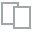
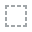
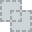
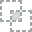
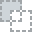
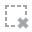
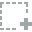
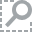
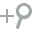
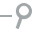
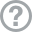
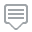
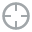
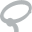
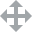
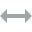
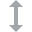
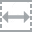
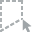
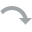
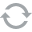
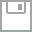
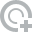
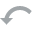
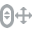
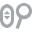
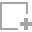
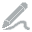
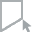
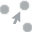
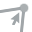
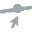

In [8]:
REMOVED_TEXT_COLS = ['last_scraped', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', "host_name"]
URL_COLS = [c for c in text_df.columns if "url" in c]
REMOVED_TEXT_COLS += URL_COLS + ["room_type"] # Exclude the y variable as well
print(REMOVED_TEXT_COLS)
text_df.drop(REMOVED_TEXT_COLS, axis=1, inplace=True)
text_report = create_report(text_df)
text_report

Observando a análise acima, as seguintes variáveis categóricas também serão removidas, por apresentarem um alto índice de valores faltantes (acima de 40%):
* neighbourhood
* host_neighbourhood
* neighborhood_overview
* host_about

Além disso, as seguintes variáveis serão removidas da análise:
* host_verifications - variável não contribui para o problema em questão
* host_has_profile_pic - variável não contribui para o problema em questão
* host_response_time- variável não contribui para o problema em questão
* host_since - variável não contribui para o problema em questão
* host_location - variável não contribui para o problema em questão
* host_has_profile_pic - variável não contribui para o problema em questão
* property_type - parece haver uma alta correlação entre essa variável e a variável room_type, o que pode enviesar o modelo

In [9]:
NEW_REMOVED_TEXT_COLS = ["neighbourhood", "host_neighbourhood", "neighborhood_overview", "host_about"]
NEW_REMOVED_TEXT_COLS += ["host_verifications", "host_location", "host_has_profile_pic", "host_response_time", "host_since", "host_has_profile_pic", "property_type"]
text_df.drop(NEW_REMOVED_TEXT_COLS, axis=1, inplace=True, errors="ignore")
print(text_df.columns)
display(text_df.head())

Index(['name', 'description', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'bathrooms_text', 'amenities',
       'instant_bookable'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


name  \
0  Very Nice 2Br in Copacabana w. balcony, fast WiFi   
1   Nice and cozy near Ipanema Beach, w/ home office   
2          Beautiful Modern Decorated Studio in Copa   
3                   Cosy flat close to Ipanema beach   
4     COPACABANA SEA BREEZE  -  RIO - 20 X Superhost   

                                         description host_is_superhost  \
0  Discounts for long term stays. <br />- Large b...                 f   
1  My studio is located in the best of Ipanema, t...                 f   
2  Our apartment is a little gem, everyone loves ...                 f   
3  This cosy apartment  is just a few steps away ...                 t   
4  Our newly renovated studio is located in the b...                 t   

  host_identity_verified neighbourhood_cleansed bathrooms_text  \
0                      t             Copacabana         1 bath   
1                      t                Ipanema         1 bath   
2                      t             Copacabana         1 bath   
3                      t                Ipanema      1.5 baths   
4                      t             Copacabana         1 bath   

                                           amenities instant_bookable  
0  ["Hangers", "Dishes and silverware", "Iron", "...                t  
1  ["Clothing storage: wardrobe", "Dining table",...                f  
2  ["Kitchen", "Cable TV", "Hangers", "Iron", "De...                f  
3  ["Hangers", "Dishes and silverware", "Iron", "...                f  
4  ["Hangers", "Dishes and silverware", "Iron", "...                f

## Limpeza dos dados para classificação

Com base nas variáveis selecionadas, uma limpeza de dados deve ser realizada tanto nos valores numéricos quanto nos não-numéricos. Para os valores numéricos, será realizada uma normalização pelo Z-Score, enquanto que para algumas variáveis não-numericas serão convertidas em variáveis do tipo One-hot;dummy, como as variáveis "host_is_superhost", "host_identity_verified", "instant_bookable". Embora as variáveis "bathroom_text" e "neighbouhood_cleansed" sejam passíveis de serem transformadas em variáveis dummy, por sua alta cardinalidade (categorias >30) iremos optar por usar sua representação em texto.

Além disso, para os valores numéricos faltantes serão substituídas pelas médias de cada variável

### Substituição pelas médias

In [10]:
NUM_COLS = list(cleaned_num_df.columns)
TEXT_COLS = list(text_df.columns)
X_COLS = NUM_COLS + TEXT_COLS
X = df.copy()[X_COLS]
for c in NUM_COLS:
  X[c] = X[c].fillna(X[c].mean())


display(X.head())
display(X.dtypes)

host_response_rate  host_acceptance_rate  host_listings_count  \
0               100.0             98.000000                  2.0   
1                50.0             45.290723                  0.0   
2                50.0             36.000000                  3.0   
3               100.0             45.290723                  1.0   
4               100.0             97.000000                  1.0   

   accommodates  bedrooms  beds  price  minimum_nights  maximum_nights  \
0             5       2.0   2.0  350.0               4             180   
1             2       1.0   1.0  297.0               3              90   
2             2       1.0   2.0  160.0               7              60   
3             2       1.0   1.0  271.0               2              89   
4             2       1.0   1.0  121.0               3              15   

   maximum_minimum_nights  ...  calculated_host_listings_count  \
0                       4  ...                               1   
1                       3  ...                               1   
2                       7  ...                               2   
3                       2  ...                               1   
4                       3  ...                               1   

   reviews_per_month                                               name  \
0               2.07  Very Nice 2Br in Copacabana w. balcony, fast WiFi   
1               0.86   Nice and cozy near Ipanema Beach, w/ home office   
2               1.86          Beautiful Modern Decorated Studio in Copa   
3               1.92                   Cosy flat close to Ipanema beach   
4               3.05     COPACABANA SEA BREEZE  -  RIO - 20 X Superhost   

                                         description  host_is_superhost  \
0  Discounts for long term stays. <br />- Large b...                  f   
1  My studio is located in the best of Ipanema, t...                  f   
2  Our apartment is a little gem, everyone loves ...                  f   
3  This cosy apartment  is just a few steps away ...                  t   
4  Our newly renovated studio is located in the b...                  t   

   host_identity_verified  neighbourhood_cleansed  bathrooms_text  \
0                       t              Copacabana          1 bath   
1                       t                 Ipanema          1 bath   
2                       t              Copacabana          1 bath   
3                       t                 Ipanema       1.5 baths   
4                       t              Copacabana          1 bath   

                                           amenities  instant_bookable  
0  ["Hangers", "Dishes and silverware", "Iron", "...                 t  
1  ["Clothing storage: wardrobe", "Dining table",...                 f  
2  ["Kitchen", "Cable TV", "Hangers", "Iron", "De...                 f  
3  ["Hangers", "Dishes and silverware", "Iron", "...                 f  
4  ["Hangers", "Dishes and silverware", "Iron", "...                 f  

[5 rows x 33 columns]

host_response_rate                float64
host_acceptance_rate              float64
host_listings_count               float64
accommodates                        int64
bedrooms                          float64
beds                              float64
price                             float64
minimum_nights                      int64
maximum_nights                      int64
maximum_minimum_nights              int64
minimum_maximum_nights              int64
availability_30                     int64
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
number_of_reviews_l30d              int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
calculated_host_listings_count    

### Normalização das variáveis numéricas pelo Z-Score

In [11]:
from scipy.stats import zscore
import numpy as np
# Keep track of all means and stds
def reverse_zscore(pandas_series, mean, std):
    yis=pandas_series*std+mean
    return yis
    
mean_std={}
for var in NUM_COLS:
    mean_std[var]=(X[var].mean(), X[var].std())
X[NUM_COLS] = X[NUM_COLS].apply(zscore)
display(X.tail())

host_response_rate  host_acceptance_rate  host_listings_count  \
23409            0.974318              1.128378            -0.181543   
23410            0.942071              1.226777            -0.212607   
23411            0.974318              1.226777            -0.150480   
23412            0.780834             -1.036398             0.719295   
23413            0.780834             -1.036398             0.719295   

       accommodates      bedrooms      beds     price  minimum_nights  \
23409      0.755278  1.179601e+00  1.074053 -0.089739       -0.109688   
23410     -0.453064 -2.026370e-16 -0.681624 -0.127126       -0.157650   
23411     -0.855844 -6.455901e-01 -0.681624 -0.107119       -0.157650   
23412      1.560839  2.092197e+00  0.635133  1.472226       -0.205612   
23413      3.171961  3.917389e+00  1.951891  1.068043       -0.205612   

       maximum_nights  maximum_minimum_nights  ...  \
23409       -0.006578                0.152580  ...   
23410       -0.006554               -0.189011  ...   
23411       -0.006579               -0.189011  ...   
23412       -0.006554                0.054982  ...   
23413       -0.006554                0.054982  ...   

       calculated_host_listings_count  reviews_per_month  \
23409                       -0.240975       3.963971e-15   
23410                        0.081752       3.963971e-15   
23411                       -0.148767       3.963971e-15   
23412                        0.496686       3.963971e-15   
23413                        0.496686       3.963971e-15   

                                                    name  \
23409   Rara Cobertura | 3qtos |Qdra Praia |Ar Split |P5   
23410                                         Studio 211   
23411                   Apartamento no inicio de Ipanema   
23412  Mansão Cliff 04 suítes Joá #RJ03 Casa Alto Pad...   
23413  Mansão Le Joux Joá 06 Quartos #RJ752 Casa para...   

                                             description  host_is_superhost  \
23409  Lindo duplex reformado há 200m DA PRAIA no Pos...                  t   
23410                                                NaN                  f   
23411  Apartamento privativo num flat residencial a p...                  f   
23412  <b>Other things to note</b><br />Localizada à ...                  f   
23413  <b>Other things to note</b><br />Mansão super ...                  f   

       host_identity_verified  neighbourhood_cleansed  bathrooms_text  \
23409                       t              Copacabana         2 baths   
23410                       t                    Leme          1 bath   
23411                       t                 Ipanema          1 bath   
23412                       t                     Joá         4 baths   
23413                       t                     Joá       5.5 baths   

                                               amenities  instant_bookable  
23409  ["Conditioner", "Dining table", "Hangers", "Mi...                 f  
23410  ["Kitchen", "Hangers", "Long term stays allowe...                 t  
23411  ["Dining table", "Wifi \u2013 120 Mbps", "Hang...                 f  
23412  ["Hangers", "Dishes and silverware", "Iron", "...                 f  
23413  ["Hangers", "Dishes and silverware", "Iron", "...                 f  

[5 rows x 33 columns]

### Transformação das variáveis não-numéricas

In [12]:
BOOLEAN_COLS = ["host_is_superhost", "host_identity_verified", "instant_bookable"]
for b in BOOLEAN_COLS:
  X[b] = X[b].replace('t', 1).replace('f', 0).fillna(0.5).astype(int)

for c in TEXT_COLS:
  X[c] = X[c].fillna('')
display(X.head())

host_response_rate  host_acceptance_rate  host_listings_count  \
0            0.974318              1.161177            -0.212607   
1           -0.638053             -0.567667            -0.274734   
2           -0.638053             -0.872399            -0.181543   
3            0.974318             -0.567667            -0.243670   
4            0.974318              1.128378            -0.243670   

   accommodates  bedrooms      beds     price  minimum_nights  maximum_nights  \
0      0.352497  0.267006 -0.242705 -0.073774       -0.061726       -0.006567   
1     -0.855844 -0.645590 -0.681624 -0.084485       -0.109688       -0.006574   
2     -0.855844 -0.645590 -0.242705 -0.112171        0.082161       -0.006576   
3     -0.855844 -0.645590 -0.681624 -0.089739       -0.157650       -0.006574   
4     -0.855844 -0.645590 -0.681624 -0.120053       -0.109688       -0.006579   

   maximum_minimum_nights  ...  calculated_host_listings_count  \
0               -0.091414  ...                       -0.287079   
1               -0.140212  ...                       -0.287079   
2                0.054982  ...                       -0.240975   
3               -0.189011  ...                       -0.287079   
4               -0.140212  ...                       -0.287079   

   reviews_per_month                                               name  \
0           1.950050  Very Nice 2Br in Copacabana w. balcony, fast WiFi   
1           0.288428   Nice and cozy near Ipanema Beach, w/ home office   
2           1.661669          Beautiful Modern Decorated Studio in Copa   
3           1.744064                   Cosy flat close to Ipanema beach   
4           3.295827     COPACABANA SEA BREEZE  -  RIO - 20 X Superhost   

                                         description  host_is_superhost  \
0  Discounts for long term stays. <br />- Large b...                  0   
1  My studio is located in the best of Ipanema, t...                  0   
2  Our apartment is a little gem, everyone loves ...                  0   
3  This cosy apartment  is just a few steps away ...                  1   
4  Our newly renovated studio is located in the b...                  1   

   host_identity_verified  neighbourhood_cleansed  bathrooms_text  \
0                       1              Copacabana          1 bath   
1                       1                 Ipanema          1 bath   
2                       1              Copacabana          1 bath   
3                       1                 Ipanema       1.5 baths   
4                       1              Copacabana          1 bath   

                                           amenities  instant_bookable  
0  ["Hangers", "Dishes and silverware", "Iron", "...                 1  
1  ["Clothing storage: wardrobe", "Dining table",...                 0  
2  ["Kitchen", "Cable TV", "Hangers", "Iron", "De...                 0  
3  ["Hangers", "Dishes and silverware", "Iron", "...                 0  
4  ["Hangers", "Dishes and silverware", "Iron", "...                 0  

[5 rows x 33 columns]

## Criação de um modelo

Para a construção do modelo, faremos inicialmente um modelo de baseline, utilizando somente as variáveis numéricas e booleanas como entrada. Nesse caso, o modelo escolhido será uma rede neural do tipo MLP, com uma única camada intermediária.

O uso de redes neurais nesse caso se justifica pois os modelos futuros farão uso de variáveis do tipo texto, construindo embeddings típicas de modelos de redes neurais como BERT

### Criando Funções auxiliares para o uso de modelos de Redes Neurais

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
def validate_model_mlp(model, X_validation, y_val, class_names):
  #Confution Matrix and Classification Report
  # make a prediction
  Y_pred = model.predict(X_validation)
  # find the correct class position
  y_pred = np.argmax(Y_pred, axis=1)
  cm = confusion_matrix(y_val, y_pred, labels=class_names)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)


  # NOTE: Fill all variables here with default values of the plot_confusion_matrix
  disp = disp.plot()
  plt.grid(b=None)
  plt.show()
  print(cm)
  print('Classification Report')
  print(classification_report(y_val, y_pred, target_names=[str(i) for i in class_names]))

def plot_history(history):
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  if 'acc' in history.history.keys():
    plot_accuracy(history)
  
def plot_accuracy(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

### Divisão em conjunto de treino e teste

Para esse caso, os dados serão divididos em dados de treino e teste (70% e 30% respectivamente). Como as classes da variável resposta "room_type" não estão igualmente distribuídas, as amostras selecionadas para treino e teste deverão manter uma proporção igual entre classes, e os modelos utilizados deverão dar um peso maior proporcionalmente à classes com menor presença nos dados

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    room_type,
                                                    test_size=0.3,
                                                    stratify=room_type) # Seleciona aproximadamente o mesmo percentual de cada classe
display(X_train[BOOLEAN_COLS])
print("Tamanho dos grupos de treino e teste")
display(X_train.shape, X_test.shape)
print("Distribuição das classes no treino")
display(pd.DataFrame(y_train).value_counts())
print("Distribuição das classes no teste")
display(pd.DataFrame(y_test).value_counts())                

host_is_superhost  host_identity_verified  instant_bookable
22616                  0                       1                 1
8951                   0                       0                 0
14438                  1                       1                 0
17912                  1                       0                 1
15002                  0                       1                 1
...                  ...                     ...               ...
457                    0                       0                 0
20920                  0                       1                 0
14809                  1                       1                 1
15380                  0                       1                 0
6198                   0                       1                 0

[16389 rows x 3 columns]

Tamanho dos grupos de treino e teste


(16389, 33)

(7025, 33)

Distribuição das classes no treino


0    1    2    3  
1.0  0.0  0.0  0.0    11982
0.0  0.0  1.0  0.0     3971
          0.0  1.0      378
     1.0  0.0  0.0       58
dtype: int64

Distribuição das classes no teste


0    1    2    3  
1.0  0.0  0.0  0.0    5136
0.0  0.0  1.0  0.0    1702
          0.0  1.0     162
     1.0  0.0  0.0      25
dtype: int64

Como os dados ainda encontram-se desbalanceados, uma técnica de Oversampling será aplicada aos dados de treino e teste

In [104]:
from sklearn.utils import class_weight
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_integers),
                                                  y=y_integers)
class_weights = dict(enumerate(class_weights))

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# fit predictor and target variable
BASELINE_COLS = NUM_COLS + BOOLEAN_COLS
print(BASELINE_COLS)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_test_ros, y_test_ros = ros.fit_resample(X_test, y_test)

print("Distribuição das classes no treino")
display(pd.DataFrame(y_train_ros).value_counts())
print("Distribuição das classes no teste")
display(pd.DataFrame(y_test_ros).value_counts())

['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'availability_30', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month', 'host_is_superhost', 'host_identity_verified', 'instant_bookable']
Distribuição das classes no treino


0  1  2  3
0  1  0  0    11982
1  0  0  0    11982
0  0  1  0     3971
      0  1      378
dtype: int64

Distribuição das classes no teste


0  1  2  3
0  1  0  0    5136
1  0  0  0    5136
0  0  1  0    1702
      0  1     162
dtype: int64

### Testando um modelo de baseline

Somente com as variáveis numéricas e uma rede MLP com uma camada intermediária

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense, Embedding, Input, Flatten, Dropout,
                                    BatchNormalization, GaussianNoise, GRU, Bidirectional, Concatenate,
                                     Conv1D,MaxPooling1D, SpatialDropout1D, GaussianNoise)



def baseline_model(activation='softmax', loss='categorical_crossentropy',
                   metrics=['accuracy']):
  data_input = Input(shape=(len(BASELINE_COLS),))
  mid = Dense(64, activation='selu')(data_input)
  drop = Dropout(0.2)(mid)
  batch = BatchNormalization()(drop)
  preds = Dense(units=4, activation=activation)(batch)

  model = Model(data_input, preds)
  model.compile(loss=loss, optimizer='adam', metrics=metrics)
  model.summary()
  return model

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28)]              0         
                                                                 
 dense_19 (Dense)            (None, 64)                1856      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_20 (Dense)            (None, 4)                 260       
                                                                 
Total params: 2,372
Trainable params: 2,244
Non-trainable params: 128
_______________________________________________________

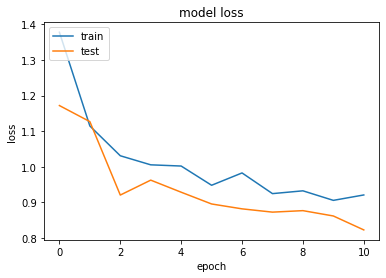

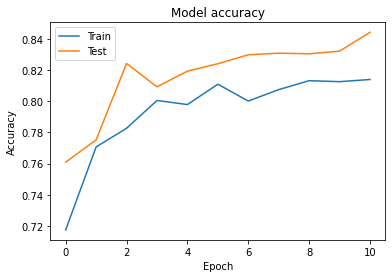

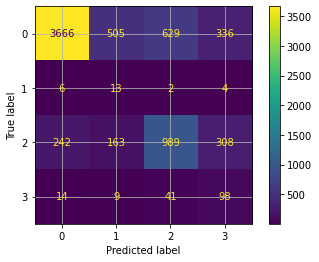

[[3666  505  629  336]
 [   6   13    2    4]
 [ 242  163  989  308]
 [  14    9   41   98]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      5136
           1       0.02      0.52      0.04        25
           2       0.60      0.58      0.59      1702
           3       0.13      0.60      0.22       162

    accuracy                           0.68      7025
   macro avg       0.42      0.60      0.41      7025
weighted avg       0.83      0.68      0.74      7025



In [36]:
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      #keras.metrics.Precision(name='precision'),
      #keras.metrics.Recall(name='recall'),
      keras.metrics.Recall(name='f1')
]
es = EarlyStopping(monitor='val_accuracy',
                     patience=10)
es2 = EarlyStopping(monitor='val_f1',
                     patience=10)
# Executa o baseline considerando classes
model = baseline_model(metrics=METRICS)
history = model.fit(X_train[BASELINE_COLS],
                     y_train,
                    batch_size=64,
                    epochs=100,
                    callbacks=[es, es2],
                    validation_data=(X_test[BASELINE_COLS],
                     y_test),
                    class_weight=class_weights)
plot_history(history)
plot_accuracy(history)
validate_model_mlp(model, X_test[BASELINE_COLS],
                     np.argmax(y_test, axis=1), class_names=range(4))

Embora o modelo baseline apresente uma alta acurácia, ele ainda possui problemas de precisão, recall e f1, o que significa que o modelo não classifica bem todas as classes presentes nos dados. Isso pode ser causado pela ausência de outras variáveis como as categóricas, ou pela ineficiência do uso da técnica de balancemanto de classes.

### Utilização das variáveis tipo texto

Para as variáveis tipo texto, utilizaremos modelos de embedding pré-treinados baseados em BERT para obter representações numéricas de cada variável, utilizando-as como entrada para nosso modelo

Para simplificação, todas as variáveis de texto serão concatenadas em um único texto

In [110]:
from sentence_transformers import SentenceTransformer
sent_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Seleciona os textos que não possuem valores booleanos
NON_BOOL = list(set(TEXT_COLS) - set(BOOLEAN_COLS))
print(NON_BOOL)
X_train_ros["text"] = X_train_ros[NON_BOOL].agg(' '.join, axis=1)
X_test["text"] = X_test[NON_BOOL].agg(' '.join, axis=1)

text_train_data = sent_model.encode(X_train_ros['text'].tolist(), batch_size=256)
text_test_data = sent_model.encode(X_test['text'].tolist(), batch_size=256)


Load pretrained SentenceTransformer: paraphrase-multilingual-MiniLM-L12-v2
Use pytorch device: cuda


['description', 'bathrooms_text', 'amenities', 'neighbourhood_cleansed', 'name']


Batches:   0%|          | 0/111 [00:00<?, ?it/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

### Proposta de um modelo mais robusto de análise

Incluindo as variáveis textuais

In [111]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense, Embedding, Input, Flatten, Dropout,
                                    BatchNormalization, GaussianNoise, GRU, Bidirectional, Concatenate,
                                     Conv1D,MaxPooling1D, SpatialDropout1D, GaussianNoise)
from focal_loss import BinaryFocalLoss


def robust_model(activation='softmax', loss=BinaryFocalLoss(gamma=5),#'categorical_crossentropy',
                   metrics=['accuracy']):
  data_input = Input(shape=(len(BASELINE_COLS),))
  text_input = Input(shape=(384,))
  mid = Dense(64, activation='selu')(data_input)
  fw1 = Dense(64, activation='selu')(text_input)
  drop_fw1 = Dropout(0.2)(fw1)
  # combine the output of the two branches
  combined = Concatenate(axis=1)([mid, drop_fw1])
  mid2 = Dense(16, activation='selu')(combined)
  drop3 = Dropout(0.2)(mid2)
  mid3 = Dense(8, activation='selu')(drop3)
  batch = BatchNormalization()(mid3)
  preds = Dense(units=4, activation=activation)(batch)

  model = Model([data_input, text_input], preds)
  model.compile(loss=loss, optimizer='adam', metrics=metrics)
  model.summary()
  return model

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_53 (InputLayer)          [(None, 384)]        0           []                               
                                                                                                  
 input_52 (InputLayer)          [(None, 28)]         0           []                               
                                                                                                  
 dense_118 (Dense)              (None, 64)           24640       ['input_53[0][0]']               
                                                                                                  
 dense_117 (Dense)              (None, 64)           1856        ['input_52[0][0]']               
                                                                                           

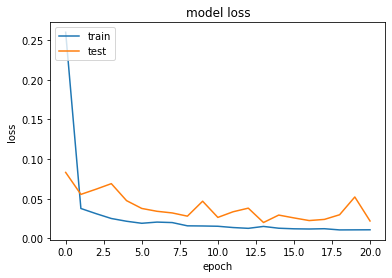

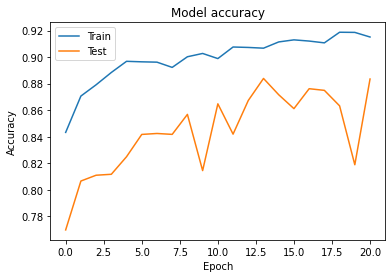

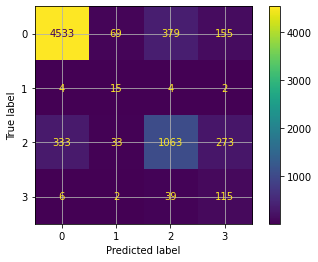

[[4533   69  379  155]
 [   4   15    4    2]
 [ 333   33 1063  273]
 [   6    2   39  115]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      5136
           1       0.13      0.60      0.21        25
           2       0.72      0.62      0.67      1702
           3       0.21      0.71      0.33       162

    accuracy                           0.82      7025
   macro avg       0.50      0.70      0.53      7025
weighted avg       0.86      0.82      0.83      7025



In [112]:
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      #keras.metrics.Precision(name='precision'),
      #keras.metrics.Recall(name='recall'),
      keras.metrics.Recall(name='f1')
]
es2 = EarlyStopping(monitor='val_f1',
                     patience=20)
# Executa o baseline considerando classes
model = robust_model(metrics=METRICS)
history = model.fit([X_train_ros[BASELINE_COLS], text_train_data],
                     y_train_ros,
                    batch_size=32,
                    epochs=100,
                    callbacks=[es2],
                    validation_data=([X_test[BASELINE_COLS], text_test_data],
                     y_test),
                    class_weight=class_weights)
plot_history(history)
plot_accuracy(history)
classes = df["room_type"].unique().tolist()

validate_model_mlp(model,[X_test[BASELINE_COLS], text_test_data],
                     np.argmax(y_test, axis=1), class_names=range(4))

Neste novo modelo, uma estratégia de oversampling foi utilizada como um complemento ao peso de cada classe em "room_type". Além disso,optou-se pela função de perda Focal (Focal Loss) com gamma=5, ajustando melhor a rede neural construída para a realidade dos dados desbalanceados. Finalmente foram utilizadas sentence embeddings pré-treinados em mais de 50 linguas para o uso das variáveis que contém texto, analisadas no sistema.

Pode-se observar que o modelo apresenta melhor acurácia, precisão, recall e f1 que o modelo baseline, porém ainda não é o suficiente para um bom modelo de predição. Há indícios também que houve um overfitting desse novo modelo, muito provavelmente ocasionado pelo alto desbalanceamento dos dados.

Futuros modelos deverão focar no balanceamento desses dados e uso de novas métricas/funções de custo que considerem esse desbalanceamento, além das técnicas já utilizadas neste desafio